<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC10%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('/content/bike.tsv')
df.head()

,dteday\tholiday\tweekday\tworkingday\tweather_id\tcnt
0,2011-01-01\t0\t6\t0\t2\t985
1,2011-01-02\t0\t0\t0\t2\t801
2,2011-01-03\t0\t1\t1\t1\t1349
3,2011-01-04\t0\t2\t1\t1\t1562
4,2011-01-05\t0\t3\t1\t1\t1600


In [2]:
# tsvファイルのため、区切り文字はTABキーを使っている。そのため'\t'を入れる
# バックスラッシュは　optionキー　と　¥　\

df = pd.read_csv('/content/bike.tsv',sep="\t")
df.head()

,dteday,holiday,weekday,workingday,weather_id,cnt
0,2011-01-01,0,6,0,2,985
1,2011-01-02,0,0,0,2,801
2,2011-01-03,0,1,1,1,1349
3,2011-01-04,0,2,1,1,1562
4,2011-01-05,0,3,1,1,1600


In [3]:
#文字コードが違う場合もある　基本はUTF-8だが違う場合は下記のようにかく


weather = pd.read_csv("/content/weather.csv",encoding="shift-jis")
weather



,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


In [4]:
temp= pd.read_json("/content/temp.json")
temp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,...,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,...,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31


In [5]:
temp.T

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


In [6]:
df2=df.merge(weather,how="inner",on="weather_id")
df2.head(2)

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
0,2011-01-01,0,6,0,2,985,曇り
1,2011-01-02,0,0,0,2,801,曇り


In [7]:
df2.groupby("weather").mean()['cnt']

<ipython-input-7-07da91e4ccee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby("weather").mean()['cnt']


weather
晴れ    4876.786177
曇り    4052.672065
雨     1803.285714
Name: cnt, dtype: float64

In [8]:
temp = temp.T
temp.loc[199:201]

,atemp,dteday,hum,temp,windspeed
199,0.747479,2011-07-19,0.650417,0.776667,0.1306
200,0.826371,2011-07-21,0.69125,0.815,0.222021
201,None,2011-07-22,0.580417,0.848333,0.1331


In [9]:
df2[df2['dteday'] =='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather
370,2011-07-20,0,3,1,1,4332,晴れ


In [10]:
df3 = df2.merge(temp,how="left",on="dteday")
df3[df3["dteday"]=='2011-07-20']

,dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
370,2011-07-20,0,3,1,1,4332,晴れ,NaN,NaN,NaN,NaN


<Axes: >

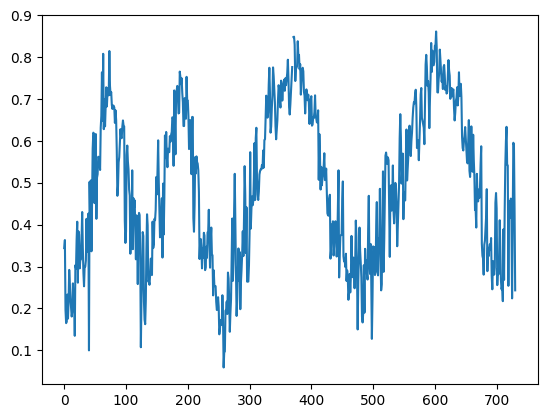

In [11]:
%matplotlib inline
df3["temp"].plot()


<Axes: >

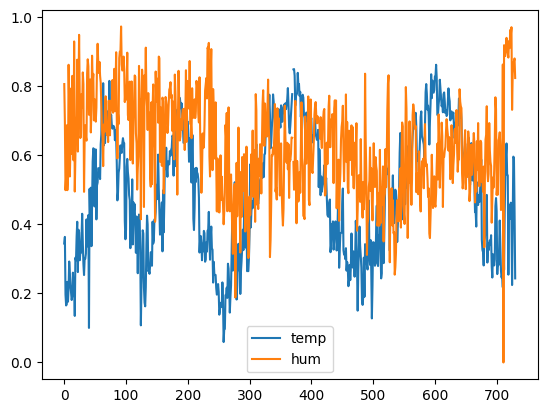

In [12]:
df3[["temp","hum"]].plot()

<Axes: ylabel='Frequency'>

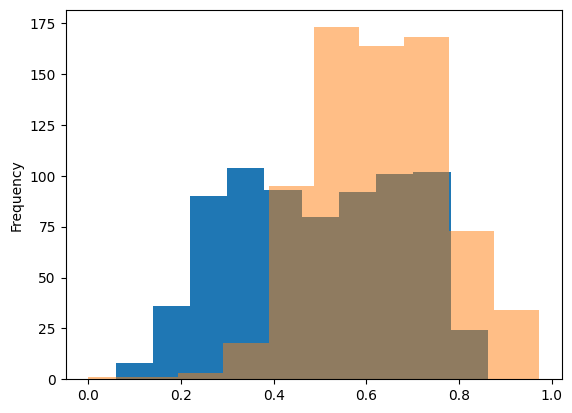

In [13]:
df3["temp"].plot(kind="hist")
df3["hum"].plot(kind="hist",alpha=0.5)


<Axes: >

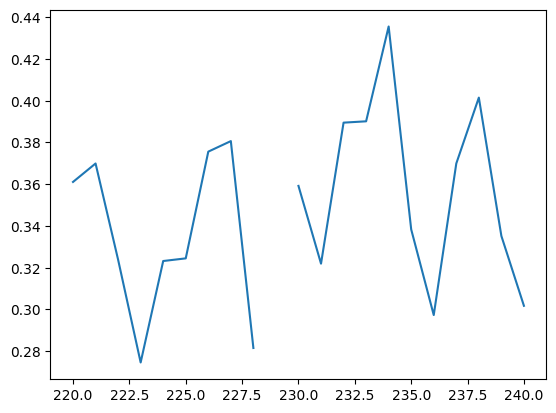

In [14]:
df3['atemp'].loc[220:240].plot(kind='line')

<Axes: >

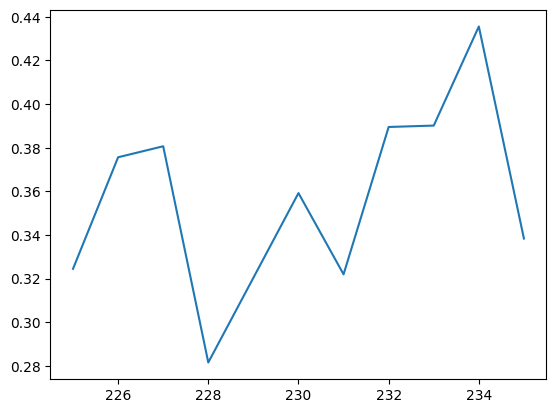

In [15]:
#atemp列のdtypeをfloatに変換
df3["atemp"] = df3["atemp"].astype(float)


df3["atemp"] =df3["atemp"].interpolate()
df3.loc[225:235,"atemp"].plot()

In [16]:
iris_df = pd.read_csv('/content/iris.csv')
non_df = iris_df.dropna() # 欠損値を含む行を削除


from sklearn.linear_model import LinearRegression
x = non_df.loc[:,"がく片幅":"花弁幅" ]
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x,t) # 欠損値予測のためのモデルを予測

LinearRegression()

In [ ]:
# 欠損行の抜き出し
condition = iris_df['がく片長さ'].isnull()
non_data = iris_df.loc[ condition ]


# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:,"がく片幅":"花弁幅"]
pred = model.predict(x)


# 欠損行のがく片長さ(cm)のマスを抜き出して、predで代入
iris_df.loc[condition,'がく片長さ']=pred